In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [ ]:
!cd '/content/drive/'

Mounted at /content/drive/


# 1. Load the data and clean

In [ ]:
import os
os.chdir("/content/drive/My Drive/T4SG St Jude/Asset CSVs")

In [ ]:
df = pandas.read_csv('BLIPOldImagesLongDescResults.csv')
df.rename(columns={df.columns[0]: 'index'}, inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head()

,image_path,actual,predicted
index,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': (0x010E) ASCII=00206969-018, 0...",arafed man in a suit reading a newspaper in a ...
1,00214636-006_TIF.jpg,"{'description': (0x010E) ASCII=00214636-006, 0...",aerial view of a garden with a heart shaped ma...
2,00204697-010_TIF.jpg,"{'description': (0x010E) ASCII=00204697-010, 0...",bottles and glasses are lined up on a conveyor...
3,00206966-004_Abraham_TIF.jpg,"{'description': (0x010E) ASCII=00206966-004, 0...",there is a man sitting at a table with a lapto...
4,00213077-009_TIF.jpg,"{'description': (0x010E) ASCII=00213077-009, 1...",there is a red street light with a yellow sign...


In [ ]:
def get_actual(input):
  index = input.index("(0x010E)") + 15; # 15 is len("(0x010E) ASCII=")
  return input[index:]

In [ ]:
for i in range(len(df)):
  print(df["actual"][i])
  df['actual'][i] = "'" + get_actual(df["actual"][i]) + "'"

{'description': (0x010E) ASCII=00206969-018, 05-23-19, staff location portraits, individuals, researchers, Bruker Ascend 1.1 GHz magnet, NMR, man, male, Babis Kalodimos PhD (Structural Biology), @ 200}
{'description': (0x010E) ASCII=00214636-006, 07-01-21, campus aerial, campus exterior, Hope garden, drone @ 188}
{'description': (0x010E) ASCII=00204697-010, 01-31-19, research instruments, laboratory, reagent bottles, glassware, cleaning, autoclave, @ 200}
{'description': (0x010E) ASCII=00206966-004, 05-23-19, staff - location portraits, office, Computational Biology, male, Brian Abraham, @ 200}
{'description': (0x010E) ASCII=00213077-009, 11-09-20, campus exteriors, campus details, fall, seasons, leaves, trees, lamp posts, street lights, flags, banners, @ 200}
{'description': (0x010E) ASCII=00204787-022, 02-05-19, research instruments, laboratory, 96 channel pipette, @ 200}
{'description': (0x010E) ASCII=10-05-22, Campus exterior, i4ARC, ARC, research tower, drone, evening, Inspiration

<ipython-input-6-1e131b5a4f65>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['actual'][i] = "'" + get_actual(df["actual"][i]) + "'"


In [ ]:
df

,number,image_path,actual,predicted
index,,,,
0,0,00206969-018_Kalodimos_TIF.jpg,"'00206969-018, 05-23-19, staff location portra...","man, business, office, business, office, business"
1,1,00214636-006_TIF.jpg,"'00214636-006, 07-01-21, campus aerial, campus...","aerial, hope, heart, garden, park, walkway"
2,2,00204697-010_TIF.jpg,"'00204697-010, 01-31-19, research instruments,...","glass, bottles, glass, glass, glass, glass"
3,3,00206966-004_Abraham_TIF.jpg,"'00206966-004, 05-23-19, staff - location port...","man, computer, desk, wall, screen, wall"
4,4,00213077-009_TIF.jpg,"'00213077-009, 11-09-20, campus exteriors, cam...",and trees in the background
...,...,...,...,...
170,170,10002670-112-V1_TIF.jpg,"'10002670, Holiday Decorations, Christmas, Jud...","children, children, children, children, childr..."
171,171,00208305-011_TIF.jpg,"'00208305-011, 07-22-19, staff - groups, labor...","two people, two, laboratory, one, student,"
172,172,00204754-001_TIF.jpg,"'00204754-001, 01-30-19, office, books, laptop...","books, glasses, laptop, desk, desk, table"


In [ ]:
import ast
import re

# Cleaning
def extract_semantic_tags(actual_str):
    # Convert string representation of dictionary to a dictionary
    # actual_dict = ast.literal_eval(actual_str)
    # print(actual_dict)
    # Get the description and split into tags
    tags = actual_str.strip(" '{}'").split(', ')
    semantic_tags = [
        tag for tag in tags
        if not re.match(r'^\d{8}-\d{3}', tag) and  # Pattern for filename like YYYYMMDD-XXX
        not re.match(r'^\d{2}-\d{2}-\d{2}', tag) and  # Pattern for date like MM-DD-YY
        not re.match(r'^\d{8}$', tag) and  # Pattern for YYYYMMDD only
        not re.match(r'^[0-9]+$', tag) and  # Exclude purely numeric tags
        not re.match(r'^\d{2}-\d{2}-\d{4}$', tag)  # Pattern for date like MM-DD-YYYY
    ]
    return ", ".join(semantic_tags)

# Apply the cleaning function to the 'actual' column
df['cleaned_actual'] = df['actual'].apply(extract_semantic_tags)

In [ ]:
df.head()

,number,image_path,actual,predicted,cleaned_actual
index,,,,,
0,0,00206969-018_Kalodimos_TIF.jpg,"'00206969-018, 05-23-19, staff location portra...","man, business, office, business, office, business","staff location portraits, individuals, researc..."
1,1,00214636-006_TIF.jpg,"'00214636-006, 07-01-21, campus aerial, campus...","aerial, hope, heart, garden, park, walkway","campus aerial, campus exterior, Hope garden, d..."
2,2,00204697-010_TIF.jpg,"'00204697-010, 01-31-19, research instruments,...","glass, bottles, glass, glass, glass, glass","research instruments, laboratory, reagent bott..."
3,3,00206966-004_Abraham_TIF.jpg,"'00206966-004, 05-23-19, staff - location port...","man, computer, desk, wall, screen, wall","staff - location portraits, office, Computatio..."
4,4,00213077-009_TIF.jpg,"'00213077-009, 11-09-20, campus exteriors, cam...",and trees in the background,"campus exteriors, campus details, fall, season..."


# Evaluation

In [ ]:
import os
os.chdir("/content/drive/My Drive/T4SG St Jude")

In [ ]:
df = pandas.read_csv('results.csv')
df.rename(columns={df.columns[0]: 'index'}, inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head()

,Unnamed: 1,Unnamed: 2
index,,
Image_path,Predicted,Actual
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h...","aerials', 'memphis views', 'memphis'"
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f...","rural', 'flower', 'growth', 'nature', 'fair we..."
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ...","research instruments', 'laboratory', 'instrume..."
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c...","interiors', 'target house'"


In [ ]:
df['Unnamed: 1']

,Unnamed: 1
index,
Image_path,Predicted
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h..."
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f..."
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ..."
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c..."
125605-0068-V1_TIF.Jpg,"campus_interiors', 'campus interiors', 'interi..."
00186682-058_wm_TIF.Jpg,"cell-culture dish', 'petri dish', 'microwell p..."
00115417-140_TIF.Jpg,"have more in memphis', 'memphis_views', ""huey'..."
00190693-001_TIF.Jpg,"room', 'interior design', 'campus interiors', ..."


In [ ]:
df = df.rename(columns={'Unnamed: 1': 'predicted'})
df = df.rename(columns={'Unnamed: 2': 'actual'})
df

,predicted,actual
index,,
Image_path,Predicted,Actual
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h...","aerials', 'memphis views', 'memphis'"
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f...","rural', 'flower', 'growth', 'nature', 'fair we..."
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ...","research instruments', 'laboratory', 'instrume..."
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c...","interiors', 'target house'"
125605-0068-V1_TIF.Jpg,"campus_interiors', 'campus interiors', 'interi...","campus interiors', 'campus', 'family commons',..."
00186682-058_wm_TIF.Jpg,"cell-culture dish', 'petri dish', 'microwell p...","cell-culture dish', 'petri dish', 'petri plate..."
00115417-140_TIF.Jpg,"have more in memphis', 'memphis_views', ""huey'...","memphis', 'memphis views'"
00190693-001_TIF.Jpg,"room', 'interior design', 'campus interiors', ...","interiors campus', 'tri delta place', 'campus'..."


In [ ]:
df = df.rename(columns={'index': 'Image-Path'})
df.drop(index=df.index[0], inplace=True)
df

,predicted,actual
index,,
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h...","aerials', 'memphis views', 'memphis'"
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f...","rural', 'flower', 'growth', 'nature', 'fair we..."
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ...","research instruments', 'laboratory', 'instrume..."
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c...","interiors', 'target house'"
125605-0068-V1_TIF.Jpg,"campus_interiors', 'campus interiors', 'interi...","campus interiors', 'campus', 'family commons',..."
00186682-058_wm_TIF.Jpg,"cell-culture dish', 'petri dish', 'microwell p...","cell-culture dish', 'petri dish', 'petri plate..."
00115417-140_TIF.Jpg,"have more in memphis', 'memphis_views', ""huey'...","memphis', 'memphis views'"
00190693-001_TIF.Jpg,"room', 'interior design', 'campus interiors', ...","interiors campus', 'tri delta place', 'campus'..."
00200273-027_TIF.Jpg,"bird', 'birds', 'adult', 'multi-channel pippet...","bird', 'nature', 'outdoors', 'outside'"


In [ ]:
%pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


In [ ]:
# SBERT
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Encode the sentences
predicted = df['predicted'].tolist()
actual = df['actual'].tolist()

In [ ]:
similarity_scores = []
for i in range(len(actual)):
    sentences = [actual[i], predicted[i]]
    embeddings = model.encode(sentences)
    similarities = model.similarity(embeddings, embeddings)
    score = similarities[0][1]
    similarity_scores.append(score.item())

df['sbert'] = similarity_scores

In [ ]:
df

,predicted,actual,sbert
index,,,
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h...","aerials', 'memphis views', 'memphis'",0.677861
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f...","rural', 'flower', 'growth', 'nature', 'fair we...",0.829187
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ...","research instruments', 'laboratory', 'instrume...",0.592391
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c...","interiors', 'target house'",0.474277
125605-0068-V1_TIF.Jpg,"campus_interiors', 'campus interiors', 'interi...","campus interiors', 'campus', 'family commons',...",0.795166
00186682-058_wm_TIF.Jpg,"cell-culture dish', 'petri dish', 'microwell p...","cell-culture dish', 'petri dish', 'petri plate...",0.803906
00115417-140_TIF.Jpg,"have more in memphis', 'memphis_views', ""huey'...","memphis', 'memphis views'",0.712235
00190693-001_TIF.Jpg,"room', 'interior design', 'campus interiors', ...","interiors campus', 'tri delta place', 'campus'...",0.774842
00200273-027_TIF.Jpg,"bird', 'birds', 'adult', 'multi-channel pippet...","bird', 'nature', 'outdoors', 'outside'",0.698254


In [ ]:
%pip install --upgrade tensorflow_hub

In [ ]:
# USE
import tensorflow_hub as hub

# Load the Universal Sentence Encoder model
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
use_embeddings = use_model(predicted + actual)
use_similarity_scores = []
for i in range(len(actual)):
    score = numpy.inner(use_embeddings[i], use_embeddings[i + len(actual)])
    use_similarity_scores.append(score)
df['use'] = use_similarity_scores
df.head()

,predicted,actual,sbert,use
index,,,,
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h...","aerials', 'memphis views', 'memphis'",0.677861,0.678193
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f...","rural', 'flower', 'growth', 'nature', 'fair we...",0.829187,0.503982
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ...","research instruments', 'laboratory', 'instrume...",0.592391,0.564105
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c...","interiors', 'target house'",0.474277,0.409782
125605-0068-V1_TIF.Jpg,"campus_interiors', 'campus interiors', 'interi...","campus interiors', 'campus', 'family commons',...",0.795166,0.665236


In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel

# Initialize CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define actual and predicted descriptions
actual_descriptions = predicted
predicted_descriptions = actual

# Compute CLIP similarity scores
clip_similarity_scores = []
for actual_desc, predicted_desc in zip(actual_descriptions, predicted_descriptions):
    inputs = processor(text=[actual_desc, predicted_desc], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model.get_text_features(**inputs)
    score = torch.cosine_similarity(outputs[0], outputs[1], dim=0).item()
    clip_similarity_scores.append(score)
df['clip'] = clip_similarity_scores
df.head()


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

,predicted,actual,sbert,use,clip
index,,,,,
00202381-124_cmp_TIF.Jpg,"mud island harbor/marina', 'memphis_views', 'h...","aerials', 'memphis views', 'memphis'",0.677861,0.678193,0.735463
00212416-020_TIF.Jpg,"sunflower', 'sun', 'yellow', 'agriculture', 'f...","rural', 'flower', 'growth', 'nature', 'fair we...",0.829187,0.503982,0.865144
00201067-003_TIF.Jpg,"inspiration advanced research center', 'lab', ...","research instruments', 'laboratory', 'instrume...",0.592391,0.564105,0.851974
00196748-006_TIF.Jpg,"campus housing', 'interior photos', 'room', 'c...","interiors', 'target house'",0.474277,0.409782,0.647693
125605-0068-V1_TIF.Jpg,"campus_interiors', 'campus interiors', 'interi...","campus interiors', 'campus', 'family commons',...",0.795166,0.665236,0.839096


In [ ]:
df.to_csv('/content/drive/MyDrive/T4SG St Jude/Asset CSVs/CLIP_eval_results.csv', index=True)

In [ ]:
df.describe()

,sbert,use,clip
count,16.000000,16.000000,16.000000
mean,0.701890,0.566196,0.787495
std,0.120292,0.119902,0.092121
min,0.449433,0.339387,0.647693
25%,0.659586,0.484730,0.697266
50%,0.719790,0.576411,0.831358
75%,0.797351,0.661454,0.866626
max,0.856225,0.742664,0.904433


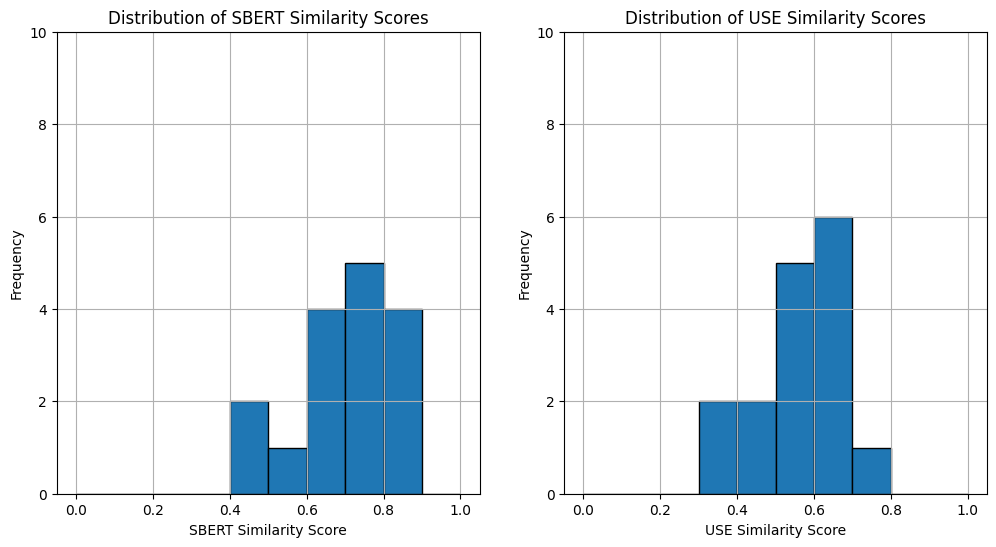

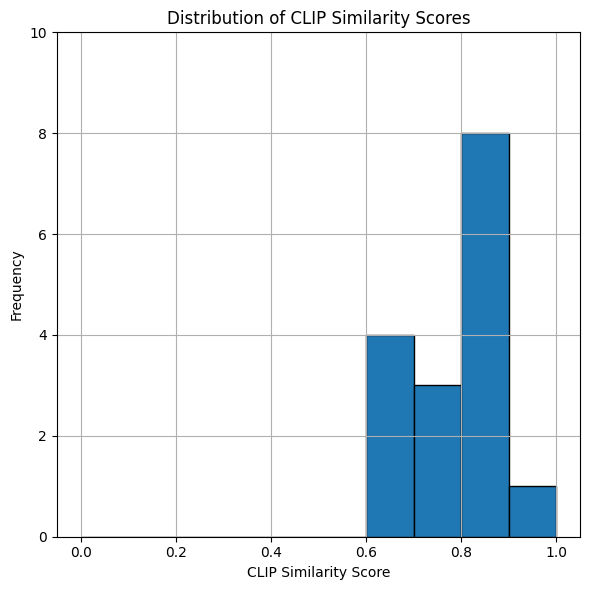

In [ ]:
plt.figure(figsize=(12, 6))
# 1st subplot
plt.subplot(1, 2, 1)
plt.ylim(0, 10)
plt.hist(df['sbert'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black')
plt.xlabel('SBERT Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of SBERT Similarity Scores')
plt.grid()
# 2nd subplot
plt.subplot(1, 2, 2)
plt.ylim(0, 10)
plt.hist(df['use'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black')
plt.xlabel('USE Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of USE Similarity Scores')
plt.grid()
# 3rd subplot
plt.figure(figsize=(6, 6))
plt.ylim(0, 10)
plt.hist(df['clip'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black')
plt.xlabel('CLIP Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of CLIP Similarity Scores')
plt.grid()
plt.tight_layout()


In [ ]:
# Save the DataFrame to a new CSV file
df.to_csv('output.csv', index=False)